# merchants EDA

Goal: Analyze merchant-level attributes


In [29]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
import numpy as np

from mastercard import dist_visualisation, dist_categorical_visualisation

In [20]:
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
PROCESSED_DATA_DIR = Path("../data/processed")
FIGURES_DIR = Path("../reports/figures")


In [6]:
df = pd.read_parquet(PROCESSED_DATA_DIR / "merchants.parquet")


In [9]:
print("Initial shape:", df.shape)

Initial shape: (1000, 8)


In [11]:
df.columns


Index(['merchant_id', 'category', 'country', 'trust_score',
       'number_of_alerts_last_6_months', 'avg_transaction_amount',
       'account_age_months', 'has_fraud_history'],
      dtype='object')

In [13]:
df.sample(10)

,merchant_id,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
619,M0620,restaurants,Denmark,0.494191,4,107.71,10,1
644,M0645,education,Portugal,0.477878,4,62.83,51,1
721,M0722,education,Denmark,0.429058,0,268.77,103,0
679,M0680,restaurants,Finland,0.464577,0,93.49,47,1
720,M0721,travel,Portugal,0.624315,2,196.54,27,1
628,M0629,electronics,Finland,0.550729,2,22.89,101,1
762,M0763,restaurants,Czech Republic,0.579384,2,44.51,91,1
386,M0387,grocery,Portugal,0.736643,1,147.85,55,0
818,M0819,education,Czech Republic,0.393582,2,55.61,38,0
557,M0558,electronics,Sweden,0.811186,4,86.06,70,1


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   merchant_id                     1000 non-null   object 
 1   category                        1000 non-null   object 
 2   country                         1000 non-null   object 
 3   trust_score                     1000 non-null   float64
 4   number_of_alerts_last_6_months  1000 non-null   int64  
 5   avg_transaction_amount          1000 non-null   float64
 6   account_age_months              1000 non-null   int64  
 7   has_fraud_history               1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trust_score,1000.0,0.682568,0.194092,0.00,0.545615,0.697414,0.825599,1.00
number_of_alerts_last_6_months,1000.0,3.061000,1.722860,0.00,2.000000,3.000000,4.000000,9.00
avg_transaction_amount,1000.0,81.883090,79.187529,0.12,24.772500,58.205000,117.192500,709.04
account_age_months,1000.0,61.526000,33.453617,6.00,32.000000,61.000000,92.000000,119.00
has_fraud_history,1000.0,0.520000,0.499850,0.00,0.000000,1.000000,1.000000,1.00


## Numerical features

In [37]:
numerical_cols = ["trust_score", "number_of_alerts_last_6_months", "avg_transaction_amount", "account_age_months"]

In [28]:
df[numerical_cols].skew()
# A positive value indicates


trust_score                      -0.336082
number_of_alerts_last_6_months    0.462118
avg_transaction_amount            1.896584
account_age_months                0.035148
dtype: float64

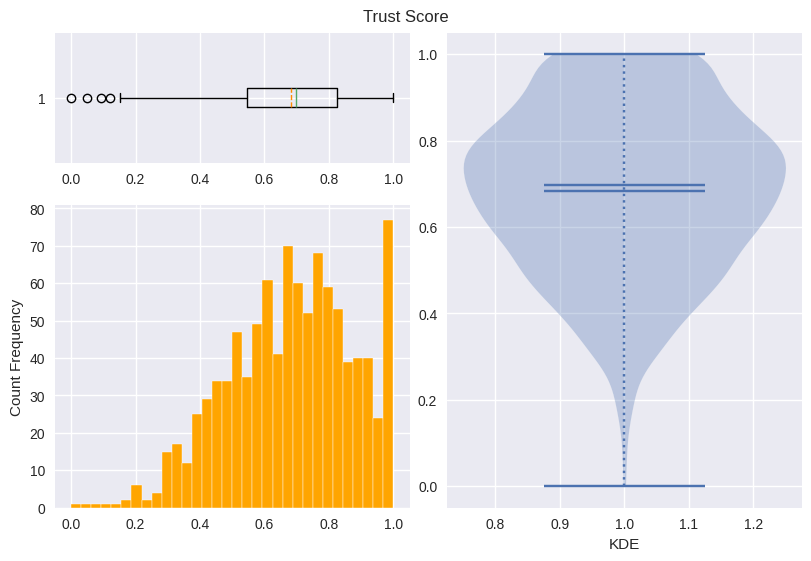

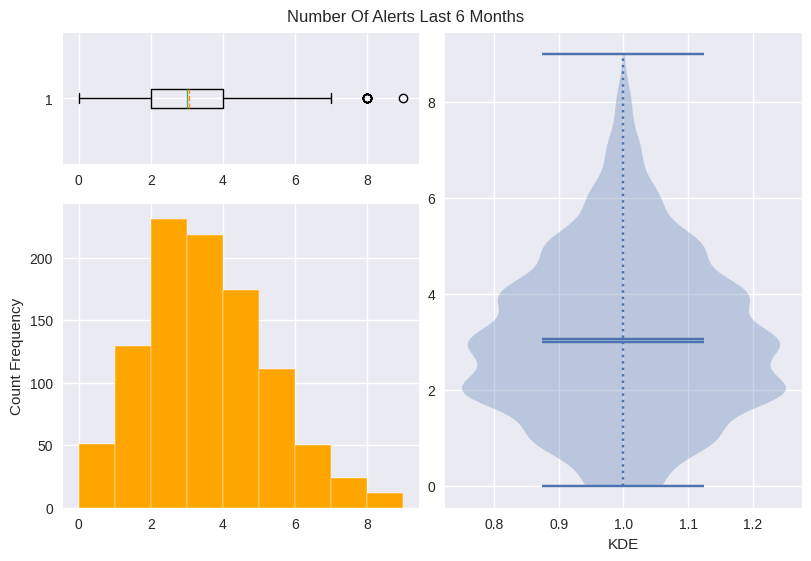

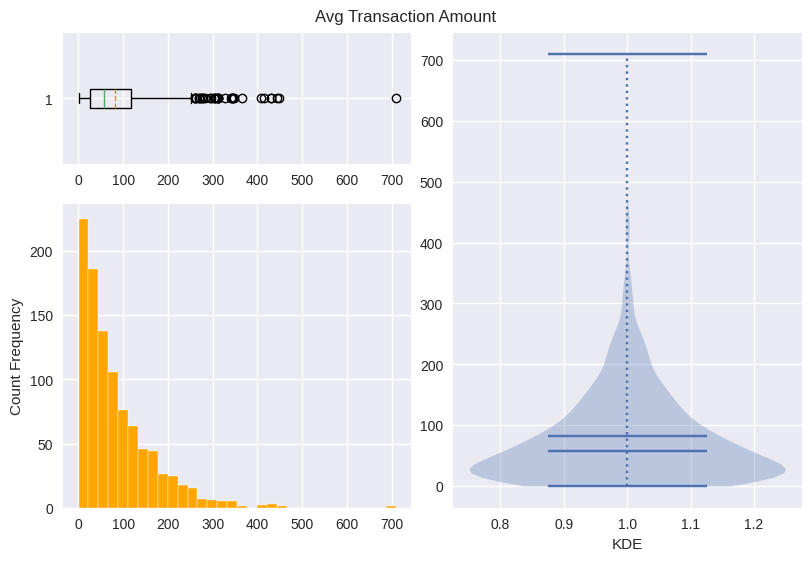

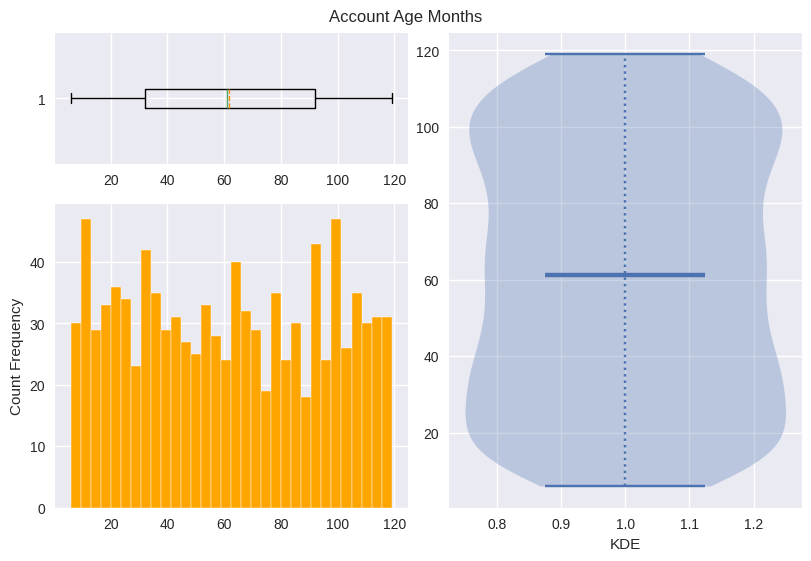

In [26]:
for coll in numerical_cols:
    dist_visualisation(df[coll], coll.title().replace("_", " "))

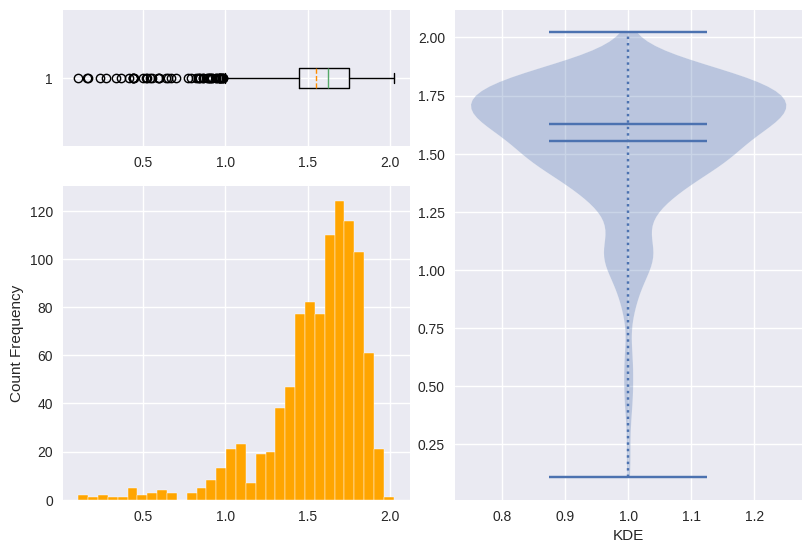

In [31]:
df["avg_transaction_amount"] = np.log1p(df["avg_transaction_amount"])
dist_visualisation(df["avg_transaction_amount"])

In [33]:

corr = df[numerical_cols].corr()

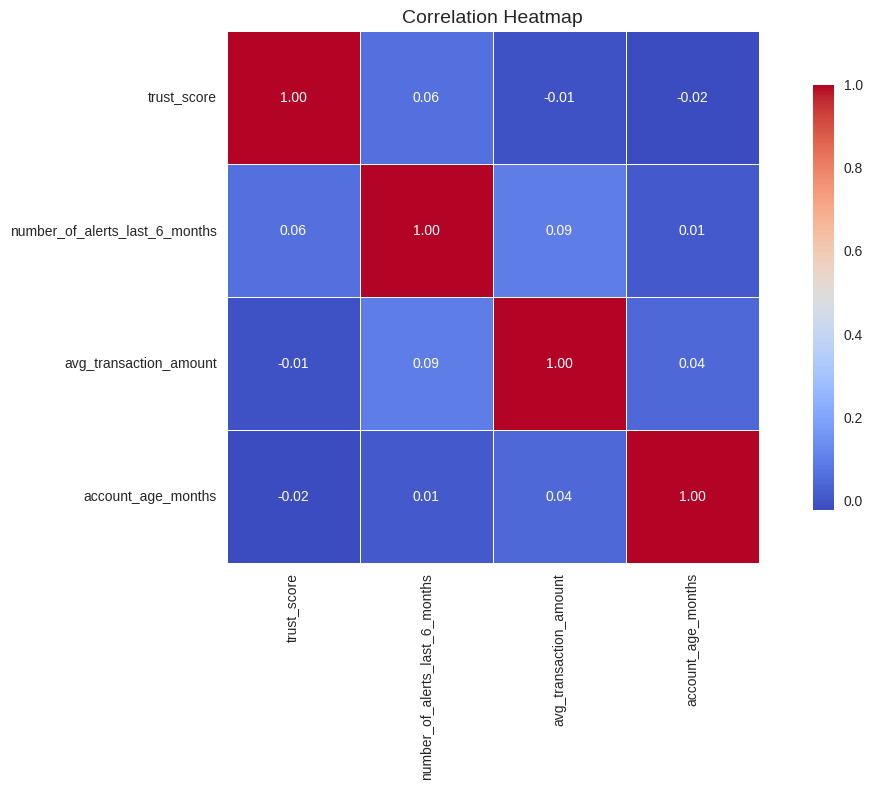

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr,
    ax = ax,
    annot = True,
    fmt = ".2f",
    square = True,
    linewidths = .5,
    cbar_kws = {"shrink": 0.8},
    cmap = "coolwarm",

    )

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


In [39]:
numerical_cols


['trust_score',
 'number_of_alerts_last_6_months',
 'avg_transaction_amount',
 'account_age_months']

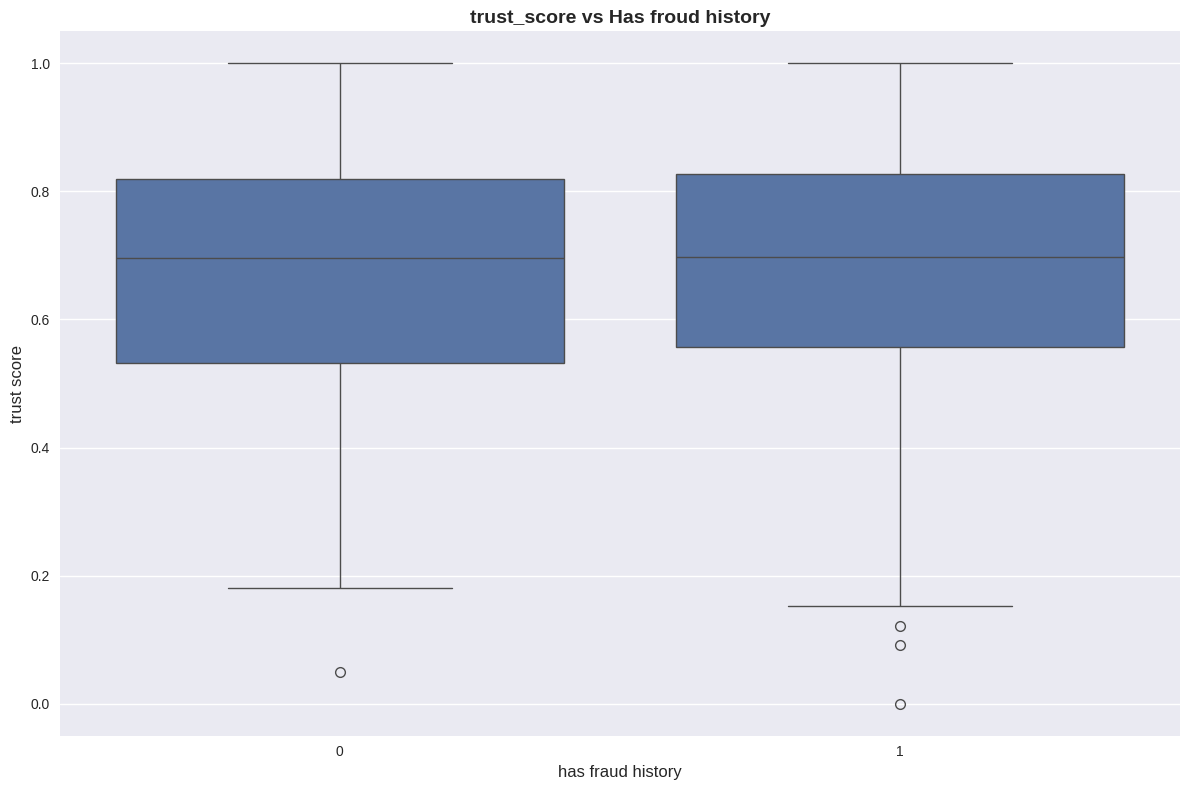

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x="has_fraud_history", y="trust_score", ax=ax)
ax.set_title("trust_score vs Has froud history", fontsize=14, weight="bold")
ax.set_xlabel("has fraud history", fontsize=12)
ax.set_ylabel("trust score", fontsize=12)
ax.tick_params(axis="x")
ax.tick_params(axis="y")
fig.tight_layout()
plt.show()

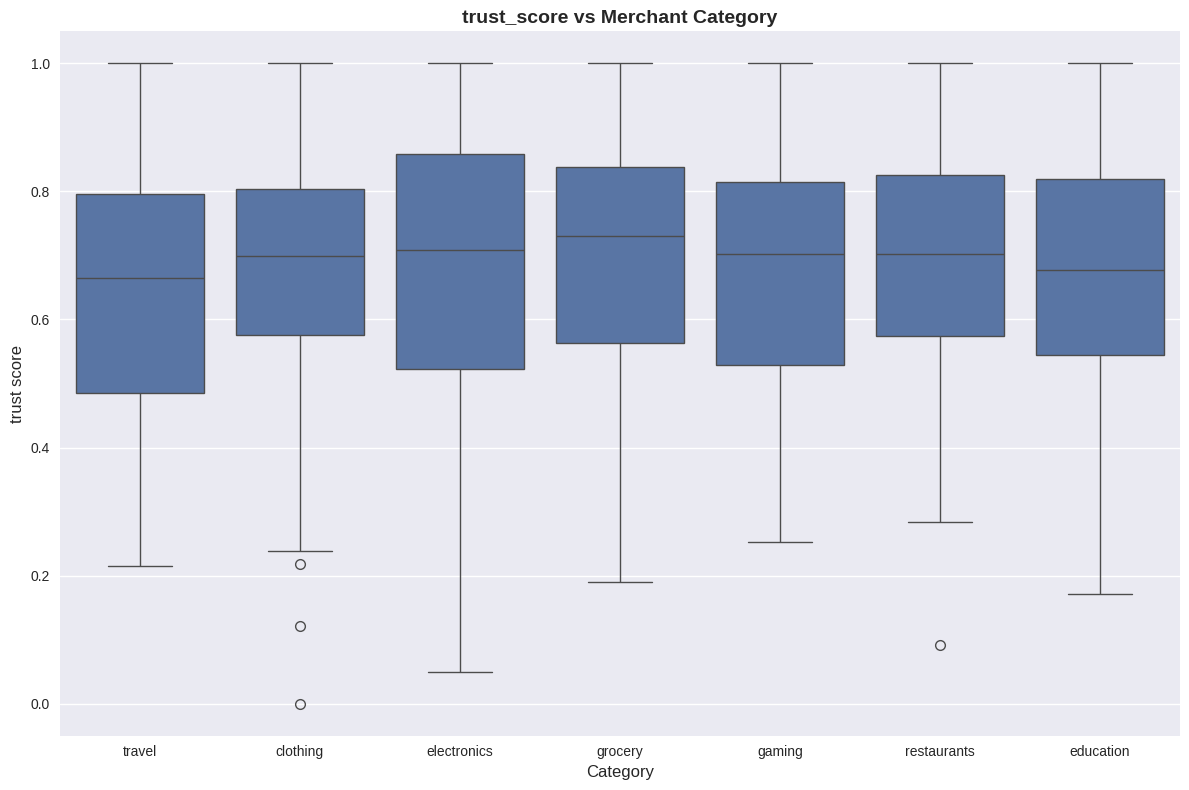

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x="category", y="trust_score", ax=ax)
ax.set_title("trust_score vs Merchant Category", fontsize=14, weight="bold")
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("trust score", fontsize=12)
ax.tick_params(axis="x")
ax.tick_params(axis="y")
fig.tight_layout()
plt.show()

,### Categorical features

In [52]:
df["category"] = df["category"].astype("category")
df["country"] = df["country"].astype("category")
df["has_fraud_history"] = df["has_fraud_history"].astype("category")

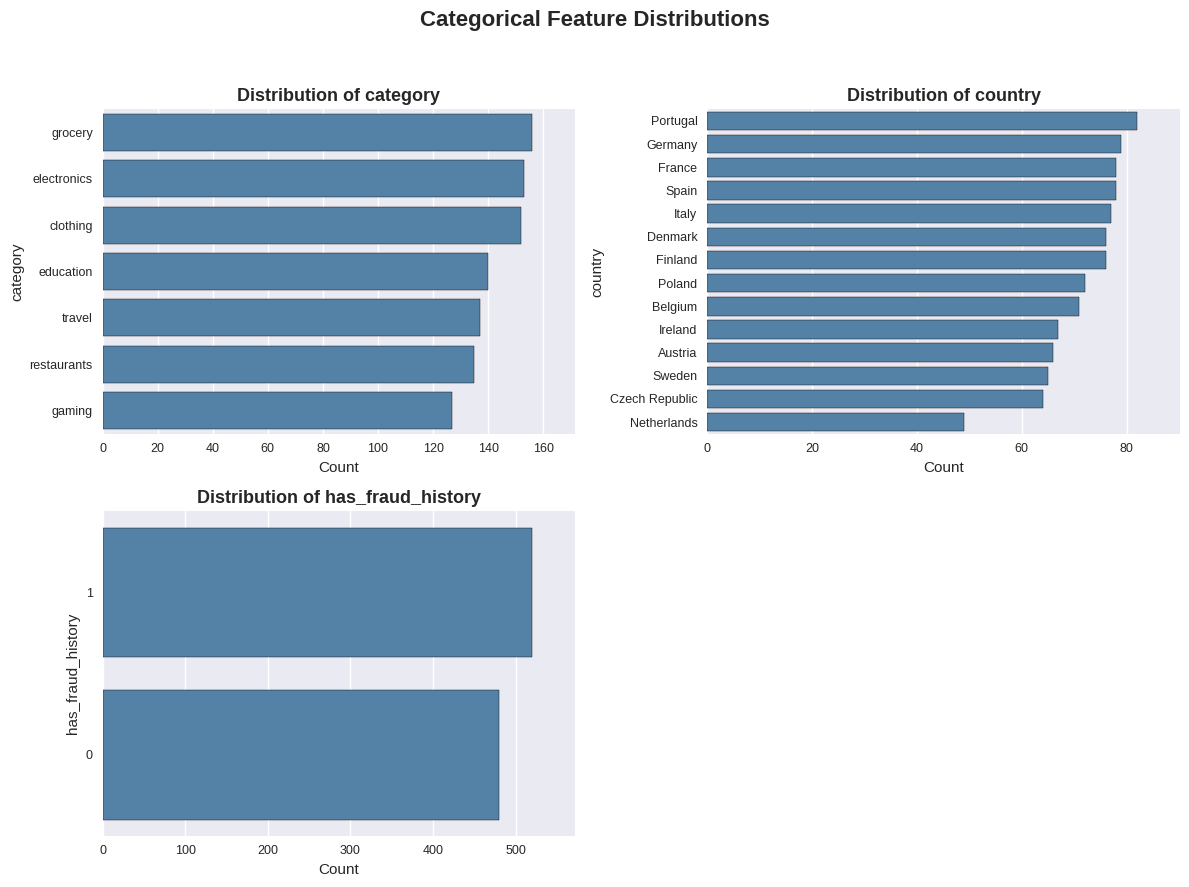

(<Figure size 1200x900 with 4 Axes>,
 array([<Axes: title={'center': 'Distribution of category'}, xlabel='Count', ylabel='category'>,
        <Axes: title={'center': 'Distribution of country'}, xlabel='Count', ylabel='country'>,
        <Axes: title={'center': 'Distribution of has_fraud_history'}, xlabel='Count', ylabel='has_fraud_history'>,
        <Axes: >], dtype=object))

In [55]:
categorical_cols = ["category", "country", "has_fraud_history"]
dist_categorical_visualisation(df, categorical_cols)